<a href="https://colab.research.google.com/github/Usama-zia/CE888-7-SP_2021_RegNo_2010999/blob/main/Lab2/Lab_2_Exercise_BootStrap_and_Permutation_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [32]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
print("version is ", np.__version__)



version is  1.19.5


In [33]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [34]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def avg(marks):
  # YOUR CODE HERE
  total_sum = 0
  for num in marks:
    total_sum = total_sum + num
    avg = total_sum / marks.shape[0]
  return avg

def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
  value = []  # used to save every bootstrapped mean value
  count = 0
 
  #This section of code is used to find
  #lower and upper percentile for 
  #95% confidence interval
  CI = 95
  t_perc = 100 - CI 
  lower_perc = t_perc / 2
  upper_perc = CI + lower_perc
  
  #Used to find basic mean
  data_mean = avg(x)
  
  #used to find every bootstrapped mean value
  while count < n_bootstraps:
    np.random.seed(count)
    new_arr = np.random.choice(a = x, size = sample_size)
    value.append(avg(new_arr))
    count += 1

  lower = np.percentile(value, lower_perc)
  upper = np.percentile(value, upper_perc)
  return data_mean, lower, upper


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

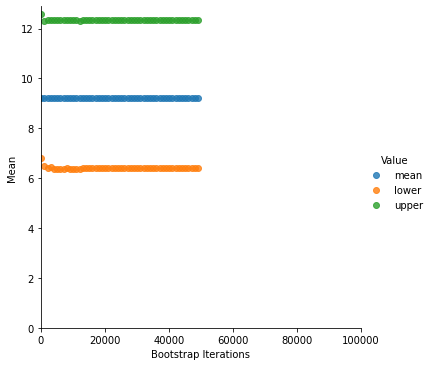

In [35]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [36]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  value = []  # used to save every bootstrapped mean value
  count = 0
 
  #This section of code is used to find
  #lower and upper percentile for 
  #95% confidence interval
  CI = ci
  t_perc = 100 - CI 
  lower_perc = t_perc / 2
  upper_perc = CI + lower_perc
  #Used to find basic mean
  data_mean = avg(sample)
  
  #used to find every bootstrapped mean value
  while count < n_bootstraps:
    np.random.seed(count)
    new_arr = np.random.choice(a = sample, size = sample_size)
    value.append(avg(new_arr))
    count += 1

  lower = np.percentile(value, lower_perc)
  upper = np.percentile(value, upper_perc)
  return data_mean, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

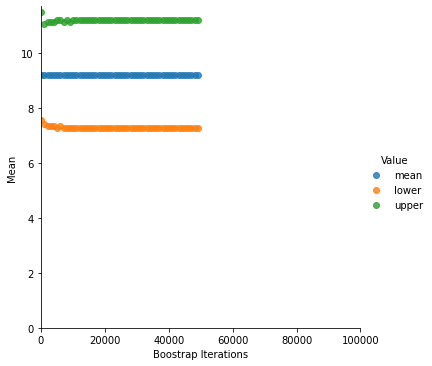

In [37]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


In [38]:
print(bootstrap_mean_ci(data, data.shape[0], 10000, 90))

(9.214285714285714, 6.785714285714286, 11.785714285714286)


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


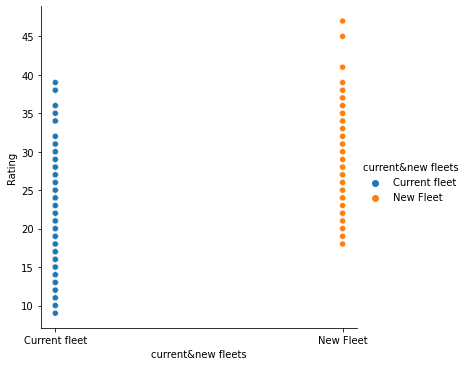

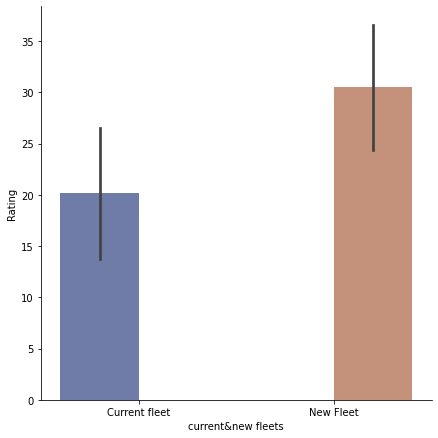

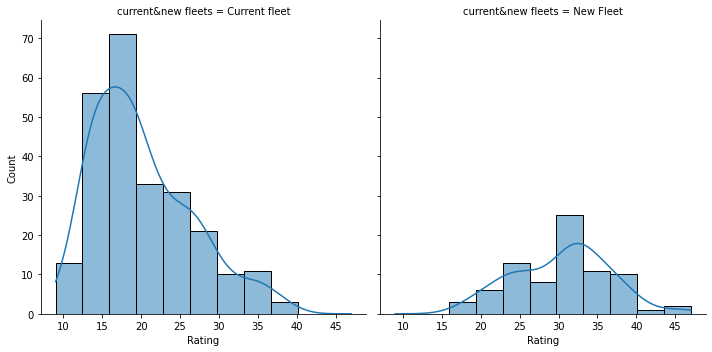

In [39]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
dfv = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
dfv_melted = dfv.melt(var_name="current&new fleets",value_name="Rating")
sns.relplot(data=dfv_melted, x="current&new fleets", y="Rating", hue="current&new fleets")
sns.catplot(data=dfv_melted, kind="bar", x="current&new fleets", y="Rating", hue="current&new fleets", ci="sd", palette="dark", alpha=.6, height=6)
sns.displot(data=dfv_melted, x="Rating", col="current&new fleets", kde=True)

# Note: you can add more cells as needed to organise your code and your plots


# Removing null values for bootstraping from Vehicle Dataset

In [40]:
#Removing null or Nan from dataset
current_fleet = dfv.values.T[0]
n_fleet = dfv.values.T[1]
test_fleet = []# removing null

for num in n_fleet:
  if num >=0:
    test_fleet.append(num)

new_fleet = np.asarray(test_fleet, dtype = float)

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [41]:
# <---INSERT YOUR CODE HERE--->
#calculating 95% CI for the Vechiles dataset
c_f = bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 10000, 95)
n_f = bootstrap_mean_ci(new_fleet, new_fleet.shape[0], 10000, 95)
print(c_f)
print(n_f)

(20.14457831325301, 19.369477911646587, 20.927811244979917)
(30.481012658227847, 29.126582278481013, 31.810126582278482)


In [42]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    con = 0
    n_t = 0
    xold = avg(sample1)
    xnew = avg(sample2)
    tobs = xnew - xold
    concat = np.concatenate((sample1, sample2))
    while con < n_permutations:
      perm = np.random.permutation(concat)
      pold = perm[:len(sample1)]
      pnew = perm[len(sample1):]
      xpold = avg(pold)
      xpnew = avg(pnew)
      tperm = xpnew - xpold
      if tperm > tobs:
        n_t+=1
      con+=1

    pvalue = n_t/n_permutations  

    return pvalue

In [43]:
#Question 7 permutation test for fleet data with 30000 Iterations
print(permut_test(current_fleet, new_fleet, 30000))
#Question 2 for 80% CI with 10000 Iterations, current_fleet means old fleet
o_f = bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 10000, 80)
print(o_f)
#Question 3 for 80% CI with 10000 Iterations
c_f = bootstrap_mean_ci(data, data.shape[0], 10000, 80)
print(c_f)

0.0
(20.14457831325301, 19.626506024096386, 20.65461847389558)
(9.214285714285714, 7.285714285714286, 11.214285714285714)


#For Standard Deviation Questions

In [44]:
#for Answering Standard Deviation Questions
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  value = []  # used to save every bootstrapped mean value
  count = 0
 
  #This section of code is used to find
  #lower and upper percentile for 
  #95% confidence interval
  CI = ci
  t_perc = 100 - CI 
  lower_perc = t_perc / 2
  upper_perc = CI + lower_perc
  #Used to find basic mean
  data_mean = np.std(sample)
  
  #used to find every bootstrapped mean value
  while count < n_bootstraps:
    np.random.seed(count)
    new_arr = np.random.choice(a = sample, size = sample_size)
    value.append(np.std(new_arr))
    count += 1

  lower = np.percentile(value, lower_perc)
  upper = np.percentile(value, upper_perc)
  return data_mean, lower, upper

In [45]:
#Question 4 for 95% CI with 10000 Iterations 
st = bootstrap_mean_ci(data, data.shape[0], 10000, 95)
print(st)
#Question 5 for 95% CI with 10000 Iterations 
sf = bootstrap_mean_ci(new_fleet, new_fleet.shape[0], 10000, 95)
print(sf)

(5.684296305594556, 2.7152254012497448, 7.326331077140188)
(6.068930545150857, 5.131687561506717, 6.9047912063154575)


# For Voting Dataset's Bootstrap Mean and Permutation Test

In [46]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]
dem_share_PA = np.asarray(dem_share_PA, dtype = float)
dem_share_OH = np.asarray(dem_share_OH, dtype = float)
#Question NO 8
PA = bootstrap_mean_ci(dem_share_PA, dem_share_PA.shape[0], 100000, 98)
OH = bootstrap_mean_ci(dem_share_OH, dem_share_OH.shape[0], 100000, 98)
print(permut_test(dem_share_OH,dem_share_PA, 30000))
print(OH)
print(PA)
print(dem_share_PA.shape[0])
print(dem_share_OH.shape[0])

0.23653333333333335
(9.839312677567582, 7.615387992509905, 12.177453826535977)
(9.729595825615187, 7.285254117445472, 12.497057250043957)
67
88
